**Phase 4: **       SVD + PCA
**Concepts:**      TF-IDF with SVD

**Loading the Dataset:**     
I loaded the 20 Newsgroups dataset and extracted the text data along with their corresponding labels to prepare it for further analysis.

In [8]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
texts = newsgroups.data
labels = newsgroups.target
label_names = newsgroups.target_names

**Text Vectorization using TF-IDF:**     
I converted the raw text documents into numerical features using the TF-IDF technique, which captures the importance of words while reducing noise and dimensionality.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(texts)
print("TF-IDF Shape:", X_tfidf.shape)

TF-IDF Shape: (18846, 5000)


** Dimensionality Reduction using Truncated SVD:**
I applied Truncated SVD to reduce the high-dimensional TF-IDF vectors to just 2 components, making the data suitable for 2D visualization and easier to analyze.

In [10]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)
print("SVD Reduced Shape:", X_reduced.shape)

SVD Reduced Shape: (18846, 2)


**2D Visualization of Reduced Data:**    
I visualized the documents in 2D using the first two SVD components, with each point colored by its original category, to observe how the topics are distributed and clustered in reduced space.

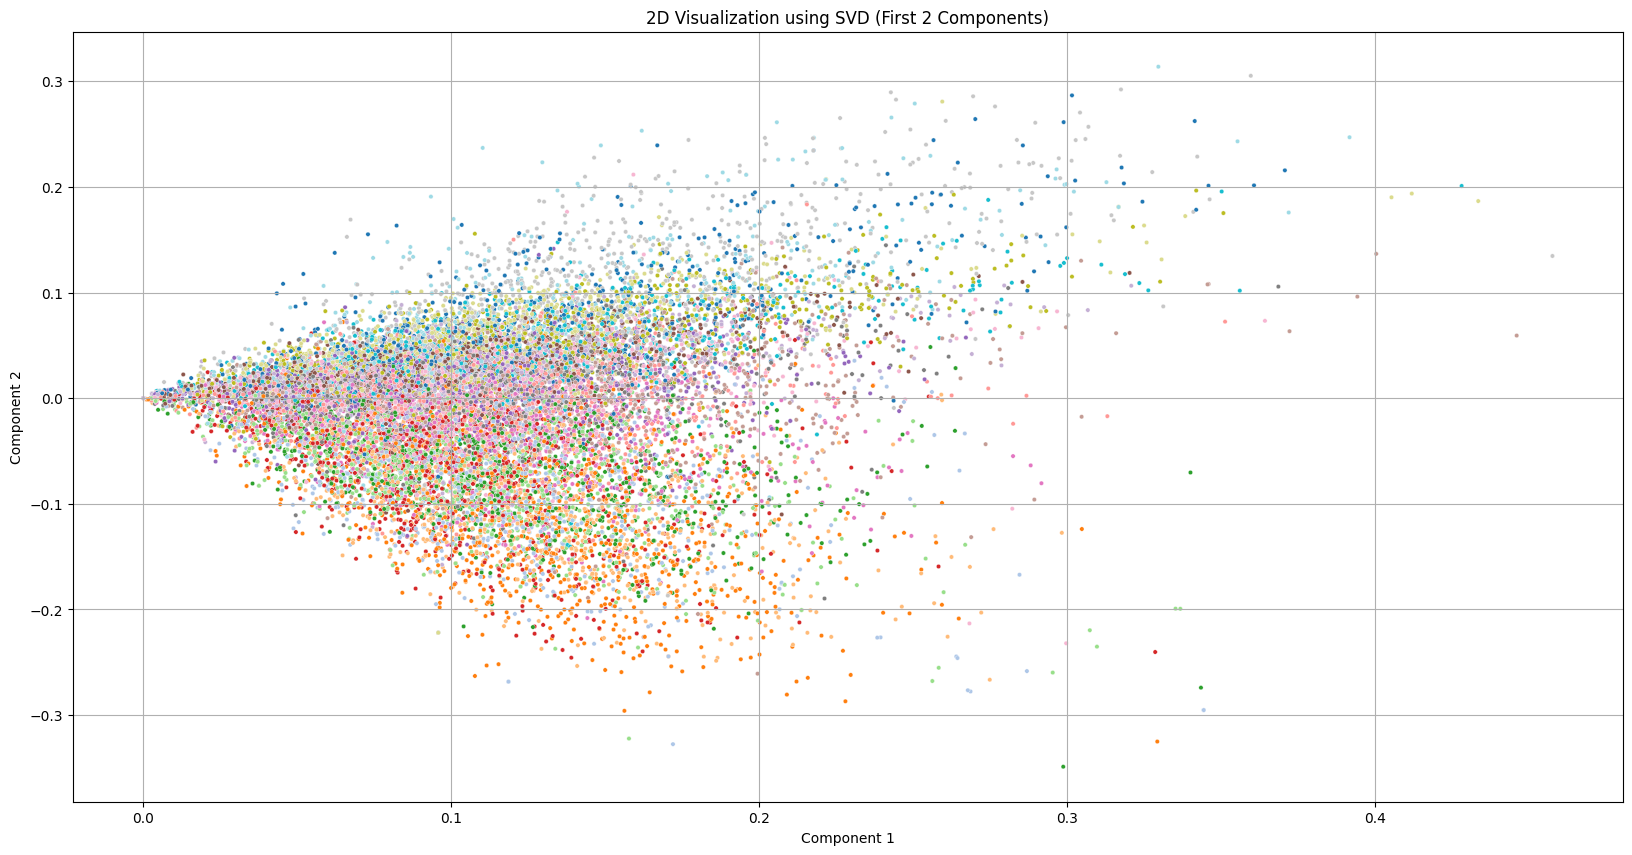

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=labels, palette='tab20', s=10, legend=False)
plt.title("2D Visualization using SVD (First 2 Components)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

**Clustering with KMeans:**    
I applied KMeans clustering on the 2D reduced data to group the documents into 20 clusters, aiming to uncover natural topic groupings without using the original labels.

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, random_state=42)
cluster_labels = kmeans.fit_predict(X_reduced)

**Evaluating Clustering Performance:**    
I calculated the Silhouette Score to assess how well the KMeans algorithm grouped similar documents together, with a higher score indicating better-defined and more separated clusters.

In [17]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_reduced, cluster_labels)
print("Silhouette Score:", round(score, 4))

Silhouette Score: 0.3399


**Summary:**     
I applied TF-IDF to convert the raw text data into a high-dimensional, sparse matrix that captures the importance of each word in the documents. Since this matrix is large and difficult to work with directly, I used Truncated SVD to reduce its dimensionality while retaining the most meaningful variance. This made it possible to visualize the data in 2D and perform computations more efficiently.After dimensionality reduction, I applied KMeans clustering to group the documents into 20 clusters. This allowed me to see whether the data naturally separates into groups that resemble the original 20 newsgroup categories. Finally, I evaluated the quality of clustering using the Silhouette Score, which measures how well-separated the clusters are.